# Evaluation of the IR System with the top ids already generated

- Lyrics Features used
    - tfidf
    - word2vec
    - **bert**

- Audio Features used
    - mfcc bow
    - mfcc stats
    - essentia
    - blf delta spectral
    - blf correlation
    - blf logfluc
    - **blf spectral**
    - blf spectral contrast
    - blf var delta spectral
    
-  Video Features used
    - incp
    - vgg19
    - **resnet**

In [1]:
import pandas as pd
import numpy as np
from os.path import exists
from tqdm import tqdm
import re
import datatable as dt
from matplotlib import pyplot as plt
import scipy.stats as stats
# Variables and functiones own defined
from files import *
from functions import *

In [2]:
genres  = dt.fread(file_genres_2).to_pandas()
genres.set_index('id', inplace=True)

In [3]:
top_baseline  = dt.fread(f_top_baseline, header=True).to_pandas()
top_baseline.set_index('index', inplace=True)

> Uncomment if it is the first time to generate the metrics data

In [4]:
# # Lyrics
top_cosine_tfidf  = dt.fread(f_top_cosine_tfidf, header=True).to_pandas().set_index('index')
top_cosine_word2vec  = dt.fread(f_top_cosine_word2vec, header=True).to_pandas().set_index('index')
# top_cosine_bert  = dt.fread(f_top_cosine_bert, header=True).to_pandas().set_index('index')
# # Audio
# top_cosine_mfcc_bow  = dt.fread(f_top_cosine_mfcc_bow, header=True).to_pandas().set_index('index')
# top_cosine_mfcc_stats  = dt.fread(f_top_cosine_mfcc_stats, header=True).to_pandas().set_index('index')
# top_cosine_essentia  = dt.fread(f_top_cosine_essentia, header=True).to_pandas().set_index('index')
# top_cosine_blf_delta_spectral  = dt.fread(f_top_cosine_blf_delta_spectral, header=True).to_pandas().set_index('index')
# top_cosine_blf_correlation  = dt.fread(f_top_cosine_blf_correlation, header=True).to_pandas().set_index('index')
# top_cosine_blf_logfluc  = dt.fread(f_top_cosine_blf_logfluc, header=True).to_pandas().set_index('index')
# top_cosine_blf_spectral  = dt.fread(f_top_cosine_blf_spectral, header=True).to_pandas().set_index('index')
# top_cosine_blf_spectral_contrast  = dt.fread(f_top_cosine_blf_spectral_contrast, header=True).to_pandas().set_index('index')
# top_cosine_blf_vardelta_spectral  = dt.fread(f_top_cosine_blf_vardelta_spectral, header=True).to_pandas().set_index('index')
# # Video
# top_cosine_incp  = dt.fread(f_top_cosine_incp, header=True).to_pandas().set_index('index')
# top_cosine_vgg19  = dt.fread(f_top_cosine_vgg19, header=True).to_pandas().set_index('index')
# top_cosine_resnet  = dt.fread(f_top_cosine_resnet, header=True).to_pandas().set_index('index')

In [5]:
# # # Lyrics
# top_jaccard_tfidf  = dt.fread(f_top_jaccard_tfidf, header=True).to_pandas().set_index('index')
# top_jaccard_word2vec  = dt.fread(f_top_jaccard_word2vec, header=True).to_pandas().set_index('index')
# top_jaccard_bert  = dt.fread(f_top_jaccard_bert, header=True).to_pandas().set_index('index')
# # Audio
# top_jaccard_mfcc_bow  = dt.fread(f_top_jaccard_mfcc_bow, header=True).to_pandas().set_index('index')
# top_jaccard_mfcc_stats  = dt.fread(f_top_jaccard_mfcc_stats, header=True).to_pandas().set_index('index')
# top_jaccard_essentia  = dt.fread(f_top_jaccard_essentia, header=True).to_pandas().set_index('index')
# top_jaccard_blf_delta_spectral  = dt.fread(f_top_jaccard_blf_delta_spectral, header=True).to_pandas().set_index('index', )
# top_jaccard_blf_correlation  = dt.fread(f_top_jaccard_blf_correlation, header=True).to_pandas().set_index('index')
# top_jaccard_blf_logfluc  = dt.fread(f_top_jaccard_blf_logfluc, header=True).to_pandas().set_index('index')
# top_jaccard_blf_spectral  = dt.fread(f_top_jaccard_blf_spectral, header=True).to_pandas().set_index('index')
# top_jaccard_blf_spectral_contrast  = dt.fread(f_top_jaccard_blf_spectral_contrast, header=True).to_pandas().set_index('index')
# top_jaccard_blf_vardelta_spectral  = dt.fread(f_top_jaccard_blf_vardelta_spectral, header=True).to_pandas().set_index('index')
# # Video
# top_jaccard_incp  = dt.fread(f_top_jaccard_incp, header=True).to_pandas().set_index('index')
# top_jaccard_vgg19  = dt.fread(f_top_jaccard_vgg19, header=True).to_pandas().set_index('index')
# top_jaccard_resnet  = dt.fread(f_top_jaccard_resnet, header=True).to_pandas().set_index('index')

In [6]:
datasets_keys = ["baseline" ,"tfidf" ,"word2vec" ,"bert" ,"mfcc_bow","mfcc_stats" ,"essentia" ,
                "blf_delta_spectral" , "blf_correlation" ,"blf_logfluc" ,"blf_spectral" ,
                 "blf_spectral_contrast","blf_vardelta_spectral" ,"incp" ,"vgg19" ,"resnet" ]

In [7]:
cosine_df = {
#     "baseline" : top_baseline,
    "tfidf" : top_cosine_tfidf,
    "word2vec" : top_cosine_word2vec,
#     "bert" : top_cosine_bert,
#     "mfcc_bow" : top_cosine_mfcc_bow,
#     "mfcc_stats" : top_cosine_mfcc_stats,
#     "essentia" : top_cosine_essentia,
#     "blf_delta_spectral" : top_cosine_blf_delta_spectral,
#     "blf_correlation" : top_cosine_blf_correlation,
#     "blf_logfluc" : top_cosine_blf_logfluc,
#     "blf_spectral" : top_cosine_blf_spectral,
#     "blf_spectral_contrast" : top_cosine_blf_spectral_contrast,
#     "blf_vardelta_spectral" : top_cosine_blf_vardelta_spectral,
#     "incp" : top_cosine_incp,
#     "vgg19" : top_cosine_vgg19,
#     "resnet" : top_cosine_resnet
}

In [8]:
jaccard_df = {
#     "baseline" : top_baseline,
#     "tfidf" : top_jaccard_tfidf,
#     "word2vec" : top_jaccard_word2vec,
#     "bert" : top_jaccard_bert,
#     "mfcc_bow" : top_jaccard_mfcc_bow,
#     "mfcc_stats" : top_jaccard_mfcc_stats,
#     "essentia" : top_jaccard_essentia,
#     "blf_delta_spectral" : top_jaccard_blf_delta_spectral,
#     "blf_correlation" : top_jaccard_blf_correlation,
#     "blf_logfluc" : top_jaccard_blf_logfluc,
#     "blf_spectral" : top_jaccard_blf_spectral,
#     "blf_spectral_contrast" : top_jaccard_blf_spectral_contrast,
#     "blf_vardelta_spectral" : top_jaccard_blf_vardelta_spectral,
#     "incp" : top_jaccard_incp,
#     "vgg19" : top_jaccard_vgg19,
#     "resnet" : top_jaccard_resnet
}

### Combinations of features

The following list is the combinations of features selected for the early and late fusion.
The selections were made on who had the best MAP and NDCG as first criertia in @100.

####  With Jaccard
Best for lyrics: bert, tfdif.

Best for audio: essentia, BLF logfluc ,MFCC stats .

Best for video:vgg19, resnet.

Combinations to test
1. Bert,   essentia    , vgg19
2. Bert,   essentia    , resnet
3. Bert,   BLF logfluc , vgg19
4. Bert,   BLF logfluc , resnet
5. Bert,   MFCC stats  , vgg19
6. Bert,   MFCC stats  , resnet
7. tfidf,  essentia    , resnet
8. tfidf,  essentia    , resnet
9. tfidf,  BLF logfluc , vgg19
10. tfidf, BLF logfluc , resnet
11. tfidf, MFCC stats  , vgg19
12. tfidf, MFCC stats  , resnet

####  With Cosine
Best for lyrics: bert, tfidf.

Bert for audio: BLF spectral, MFCC Bow, BLF logfluc.

Best for video: resnet, incp.

Combinations to test
1. Bert,  BLF spectral , resnet
2. Bert,  BLF spectral , incp
3. Bert,  MFCC Bow     , resnet
4. Bert,  MFCC Bow     , incp
5. Bert,  BLF logfluc  , resnet
6. Bert,  BLF logfluc  , incp
7. tfidf, BLF spectral , resnet
8. tfidf, BLF spectral , incp
9. tfidf, MFCC Bow     , resnet
10. tfidf, MFCC Bow     , incp
11. tfidf, BLF logfluc  , resnet
12. tfidf, BLF logfluc  , incp

> Uncomment the load of the files if it is the first time only

In [9]:
top_cosine_bert_blf_spectral_incp  = dt.fread(f_top_cosine_bert_blf_spectral_incp, header=True).to_pandas().set_index('index')
top_cosine_bert_blf_spectral_resnet = dt.fread(f_top_cosine_bert_blf_spectral_resnet, header=True).to_pandas().set_index('index')
top_cosine_bert_mfcc_bow_incp  = dt.fread(f_top_cosine_bert_mfcc_bow_incp, header=True).to_pandas().set_index('index')
top_cosine_bert_mfcc_bow_resnet = dt.fread(f_top_cosine_bert_mfcc_bow_resnet, header=True).to_pandas().set_index('index')
top_cosine_bert_blf_logfluc_incp  = dt.fread(f_top_cosine_bert_blf_logfluc_incp, header=True).to_pandas().set_index('index')
top_cosine_bert_blf_logfluc_resnet = dt.fread(f_top_cosine_bert_blf_logfluc_resnet, header=True).to_pandas().set_index('index')
top_cosine_tfidf_blf_spectral_incp  = dt.fread(f_top_cosine_tfidf_blf_spectral_incp, header=True).to_pandas().set_index('index')
top_cosine_tfidf_blf_spectral_resnet = dt.fread(f_top_cosine_tfidf_blf_spectral_resnet, header=True).to_pandas().set_index('index')
top_cosine_tfidf_mfcc_bow_incp  = dt.fread(f_top_cosine_tfidf_mfcc_bow_incp, header=True).to_pandas().set_index('index')
top_cosine_tfidf_mfcc_bow_resnet = dt.fread(f_top_cosine_tfidf_mfcc_bow_resnet, header=True).to_pandas().set_index('index')
top_cosine_tfidf_blf_logfluc_incp  = dt.fread(f_top_cosine_tfidf_blf_logfluc_incp, header=True).to_pandas().set_index('index')
top_cosine_tfidf_blf_logfluc_resnet = dt.fread(f_top_cosine_tfidf_blf_logfluc_resnet, header=True).to_pandas().set_index('index')

In [10]:
cosine_early_datasets = {
    "baseline" : top_baseline,
    "bert_blf_spectral_resnet" : top_cosine_bert_blf_spectral_resnet,
    "bert_blf_spectral_incp" : top_cosine_bert_blf_spectral_incp,
    "bert_mfcc_bow_resnet" : top_cosine_bert_mfcc_bow_resnet,
    "bert_mfcc_bow_incp" : top_cosine_bert_mfcc_bow_incp,
    "bert_blf_logfluc_resnet" : top_cosine_bert_blf_logfluc_resnet,
    "bert_blf_logfluc_incp" : top_cosine_bert_blf_logfluc_incp,
    "tfidf_blf_spectral_resnet" : top_cosine_tfidf_blf_spectral_resnet,
    "tfidf_blf_spectral_incp" : top_cosine_tfidf_blf_spectral_incp,
    "tfidf_mfcc_bow_resnet" : top_cosine_tfidf_mfcc_bow_resnet,
    "tfidf_mfcc_bow_incp" : top_cosine_tfidf_mfcc_bow_incp,
    "tfidf_blf_logfluc_resnet" : top_cosine_tfidf_blf_logfluc_resnet,
    "tfidf_blf_logfluc_incp" : top_cosine_tfidf_blf_logfluc_incp,
}

In [103]:
top_jaccard_bert_essentia_vgg19      = dt.fread(f_top_jaccard_bert_essentia_vgg19, header=True).to_pandas().set_index('index')      
top_jaccard_bert_essentia_resnet     = dt.fread(f_top_jaccard_bert_essentia_resnet, header=True).to_pandas().set_index('index')    
top_jaccard_bert_blf_logfluc_vgg19   = dt.fread(f_top_jaccard_bert_blf_logfluc_vgg19, header=True).to_pandas().set_index('index')   
top_jaccard_bert_blf_logfluc_resnet  = dt.fread(f_top_jaccard_bert_blf_logfluc_resnet, header=True).to_pandas().set_index('index')
top_jaccard_bert_mfcc_stats_vgg19    = dt.fread(f_top_jaccard_bert_mfcc_stats_vgg19, header=True).to_pandas().set_index('index')   
top_jaccard_bert_mfcc_stats_resnet   = dt.fread(f_top_jaccard_bert_mfcc_stats_resnet, header=True).to_pandas().set_index('index')  
top_jaccard_tfidf_essentia_vgg19     = dt.fread(f_top_jaccard_tfidf_essentia_vgg19, header=True).to_pandas().set_index('index')   
top_jaccard_tfidf_essentia_resnet    = dt.fread(f_top_jaccard_tfidf_essentia_resnet, header=True).to_pandas().set_index('index')      
top_jaccard_tfidf_blf_logfluc_vgg19  = dt.fread(f_top_jaccard_tfidf_blf_logfluc_vgg19, header=True).to_pandas().set_index('index')  
top_jaccard_tfidf_blf_logfluc_resnet = dt.fread(f_top_jaccard_tfidf_blf_logfluc_resnet, header=True).to_pandas().set_index('index')
top_jaccard_tfidf_mfcc_stats_vgg19   = dt.fread(f_top_jaccard_tfidf_mfcc_stats_vgg19, header=True).to_pandas().set_index('index')   
top_jaccard_tfidf_mfcc_stats_resnet  = dt.fread(f_top_jaccard_tfidf_mfcc_stats_resnet, header=True).to_pandas().set_index('index')   

In [104]:
jaccard_early_datasets = {
    "baseline" : top_baseline,
    "bert_essentia_vgg19" : top_jaccard_bert_essentia_vgg19,
    "bert_essentia_resnet" : top_jaccard_bert_essentia_resnet,
    "bert_blf_logfluc_vgg19" : top_jaccard_bert_blf_logfluc_vgg19,
    "bert_blf_logfluc_resnet" : top_jaccard_bert_blf_logfluc_resnet,
    "bert_mfcc_stats_vgg19" : top_jaccard_bert_mfcc_stats_vgg19,
    "bert_mfcc_stats_resnet" : top_jaccard_bert_mfcc_stats_resnet,
    "tfidf_essentia_vgg19" : top_jaccard_tfidf_essentia_vgg19,
    "tfidf_essentia_resnet" : top_jaccard_tfidf_essentia_resnet,
    "tfidf_blf_logfluc_vgg19" : top_jaccard_tfidf_blf_logfluc_vgg19,
    "tfidf_blf_logfluc_resnet" : top_jaccard_tfidf_blf_logfluc_resnet,
    "tfidf_mfcc_stats_vgg19" : top_jaccard_tfidf_mfcc_stats_vgg19,
    "tfidf_mfcc_stats_resnet" : top_jaccard_tfidf_mfcc_stats_resnet,
}

## Evaluation metrics

Gain for the user is considered with the genre, if the song retrieved contains the genre the gain will be 1, 
if not 0.

For example:
Given the array of results marked as relevant  `[1, 0, 0, 1, 1` for @k = @5
For the first consideration the user gain will be the same d1(1), d2(0), d3(0), d4(1), d5(1)


In [13]:
_, mean_ndcg = ndcgMean(top_cosine_tfidf.iloc[:200], 100, genres)
mean_ndcg

100%|████████████████████████████████████████| 200/200 [00:00<00:00, 380.69it/s]


0.7692370066424492

In [14]:
MRR = meanReciprocalRank(top_cosine_tfidf.iloc[:200], 100, genres)

100%|████████████████████████████████████████| 200/200 [00:00<00:00, 473.61it/s]


In [15]:
MAP = meanAveragePrecision(top_cosine_tfidf.iloc[:200], 100, genres)

100%|████████████████████████████████████████| 200/200 [00:00<00:00, 457.81it/s]


In [16]:
print("Individual Results", MAP, MRR, mean_ndcg)

Individual Results 0.5444188945766615 0.7051201365243449 0.7692370066424492


In [17]:
print("Single function", getMetrics(top_cosine_tfidf.iloc[:200], 100, genres))

100%|████████████████████████████████████████| 200/200 [00:00<00:00, 387.86it/s]

Single function (0.5444188945766615, 0.7051201365243449, 0.7692370066424492)


## Evaluation of datasets with MAP, MRR and Mean NDCG at top 100 cosine and jaccard

In [18]:
metrics_jaccard = generate_MAP_MRR_NDCG_file('./TopIdsTask2/df_metrics_jaccard.csv', jaccard_df, genres)

In [19]:
# metrics_jaccard

In [20]:
def min_value1(s):
    is_max = s == s.min()
    return ['color: red' if v else '' for v in is_max]

def highlight1(s,p,color):
    is_max = s.isin(s.nlargest(3).iloc[[p]])
    return [f'background-color: {color}' if v else '' for v in is_max]

def style_df1(dataframe):
    return dataframe.style.\
        apply(highlight1,p=0,color='DarkTurquoise  ').\
        apply(highlight1,p=1,color='DarkSeaGreen  ').\
        apply(highlight1,p=2,color='PaleGreen ').\
        apply(min_value1)

In [21]:
style_df1(metrics_jaccard)

,MAP_10,MAP_100,MRR_10,MRR_100,Mean NDCG_10,Mean NDCG_100
baseline,0.538928,0.468788,0.598932,0.603907,0.647442,0.702656
tfidf,0.613008,0.533717,0.675649,0.679554,0.708545,0.749511
word2vec,0.595455,0.528458,0.654077,0.658399,0.691671,0.738485
bert,0.635672,0.555337,0.701501,0.704617,0.730580,0.768298
mfcc_bow,0.587747,0.517094,0.655531,0.660159,0.690866,0.742419
mfcc_stats,0.816116,0.487810,1.000000,1.000000,0.872848,0.757469
essentia,0.859410,0.564858,1.000000,1.000000,0.900627,0.806830
blf_delta_spectral,0.550818,0.342966,0.677026,0.683731,0.654726,0.617797
blf_correlation,0.519026,0.446352,0.576503,0.581919,0.627646,0.687641
blf_logfluc,0.776459,0.473369,0.845938,0.845938,0.931068,0.789124


In [22]:
metrics_cosine = generate_MAP_MRR_NDCG_file('./TopIdsTask2/df_metrics_cosine.csv', cosine_df, genres)

In [23]:
style_df1(metrics_cosine)

,MAP_10,MAP_100,MRR_10,MRR_100,Mean NDCG_10,Mean NDCG_100
baseline,0.538928,0.468788,0.598932,0.603907,0.647442,0.702656
tfidf,0.613008,0.533717,0.675649,0.679554,0.708545,0.749511
word2vec,0.620400,0.531775,0.688450,0.691843,0.716072,0.752696
bert,0.662672,0.582196,0.724919,0.727862,0.749986,0.782546
mfcc_bow,0.686824,0.611884,0.745530,0.748228,0.769581,0.799817
mfcc_stats,0.664766,0.590064,0.723618,0.726565,0.751656,0.784836
essentia,0.589838,0.518657,0.652015,0.655964,0.690800,0.738632
blf_delta_spectral,0.660291,0.580011,0.724746,0.727659,0.749790,0.782696
blf_correlation,0.659301,0.576152,0.721618,0.724617,0.748001,0.779366
blf_logfluc,0.684362,0.606019,0.743900,0.746621,0.767867,0.796682


In [26]:
# # Examples of execution as single function
p, r, p_max = Precision(top_cosine_tfidf, 100, False, genres)
p1, r1, p1_max = Precision(top_cosine_word2vec, 100, False, genres)

68641it [03:57, 289.34it/s]
68641it [03:35, 318.55it/s]


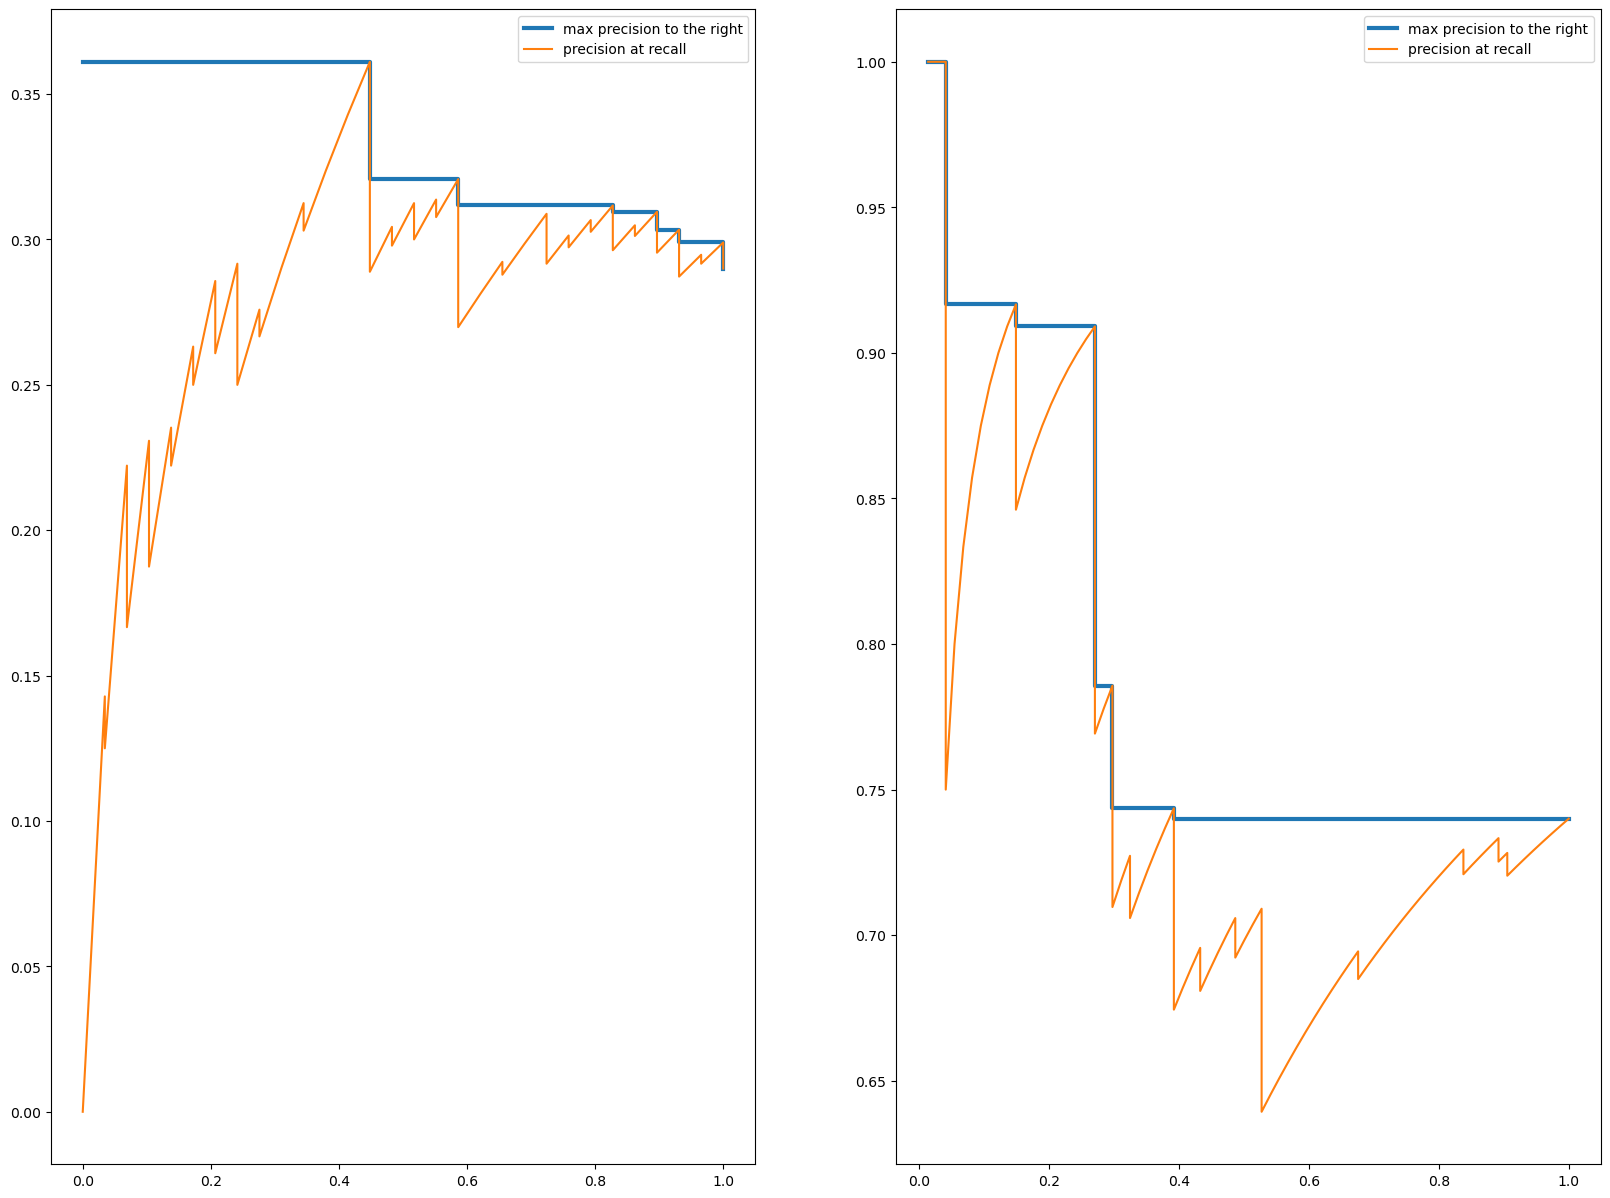

In [27]:
index_test = 2
fig, axs = plt.subplots(ncols=2, nrows=1, figsize=(20, 15))
axs[0].plot(r[index_test], p_max[index_test], label='max precision to the right', linewidth=3)
axs[0].plot(r[index_test], p[index_test], label='precision at recall')
axs[0].legend()
axs[1].plot(r1[index_test], p1_max[index_test],  label='max precision to the right', linewidth=3)
axs[1].plot(r1[index_test], p1[index_test], label='precision at recall' )
axs[1].legend()
plt.show()

In the figure above we plot for a single querie how looks the precision-recall using precision and max precision to the right with differente features.

In the next plot we can see the mean of precision-recall plots in all the queries using the max precision to the right.

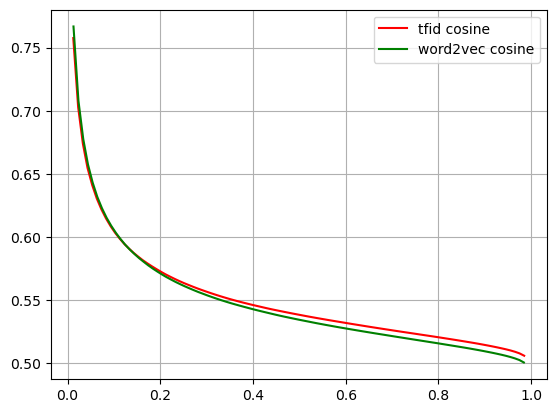

In [28]:
plt.plot(np.mean(r, axis=0), np.mean(p_max, axis=0), color='r', label='tfid cosine')
plt.plot(np.mean(r1, axis=0), np.mean(p1_max, axis=0), color='g', label='word2vec cosine')
plt.grid()
plt.legend()
plt.show()

In [24]:
jaccard_P, jaccard_R, jaccard_P_max = get_preicison_data(file_jaccard_mean_precision_datasets,
                                                         file_jaccard_mean_recall_datasets,
                                                         file_jaccard_maxprecision_precision_datasets,
                                                         jaccard_df,
                                                         genres
                                                        )

In [25]:
cosine_P, cosine_R, cosine_P_max = get_preicison_data(file_cosine_mean_precision_datasets,
                                                         file_cosine_mean_recall_datasets,
                                                         file_cosine_maxprecision_precision_datasets,
                                                         cosine_df,
                                                         genres
                                                        )

Text(0.5, 0.98, 'Comparison between Precision-Recall using Cosine and Jaccard Similarity')

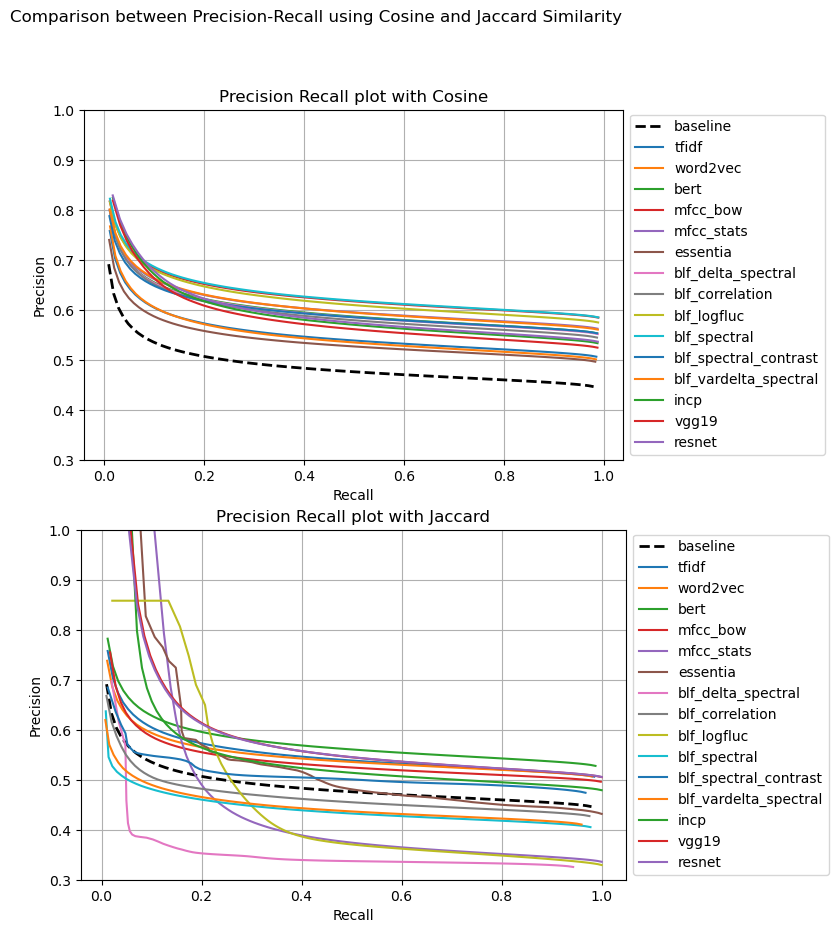

In [26]:
fig, axs = plt.subplots(ncols=1, nrows=2, figsize=(30, 10))

for i,key in enumerate(datasets_keys):
    if (key == 'baseline'):
        axs[0].plot(cosine_R[i], cosine_P_max[i], label=key, linestyle='dashed', color='black', linewidth=2)
    else:
        axs[0].plot(cosine_R[i], cosine_P_max[i], label=key)

axs[0].set_xlabel("Recall")
axs[0].set_ylabel("Precision")
axs[0].set_title("Precision Recall plot with Cosine")  # Add a title to the axes.
axs[0].set_aspect('equal')
axs[0].set_ylim(0.3,1) 
# ax.set_xlim(0,1) 
axs[0].grid(True)
axs[0].legend(loc='center left', bbox_to_anchor=(1, 0.5))

for i,key in enumerate(datasets_keys):
    if (key == 'baseline'):
        axs[1].plot(jaccard_R[i], jaccard_P_max[i], label=key, linestyle='dashed', color='black', linewidth=2)
    else:
        axs[1].plot(jaccard_R[i], jaccard_P_max[i], label=key)

axs[1].set_xlabel("Recall")
axs[1].set_ylabel("Precision")
axs[1].set_title("Precision Recall plot with Jaccard")  # Add a title to the axes.
axs[1].set_aspect('equal')
axs[1].set_ylim(0.3,1) 
axs[1].grid(True)
axs[1].legend(loc='center left', bbox_to_anchor=(1, 0.5))

fig.suptitle('Comparison between Precision-Recall using Cosine and Jaccard Similarity')

## Comparing between lyrics, audio and video

In [27]:
def plot_lyrics_audio_video_precision_curves(lyrics, audio, video, data, keys, name):
    
    labels = datasets_keys
    fig, axs = plt.subplots(ncols=1, nrows=3, figsize=(10, 15))
    R, P_max = data

    # Lyrics
    for i in range(1,4):
        if keys[i] in lyrics:
            axs[0].plot(R[i], P_max[i], label=keys[i])
    axs[0].plot(R[0], P_max[0], label='baseline', linestyle='dashed', color='black', linewidth=2)
    axs[0].set_ylim(0.4,0.8) 
    axs[0].grid(True)
    axs[0].legend(loc='center left', bbox_to_anchor=(1, 0.5))
    axs[0].set_xlabel("Recall")
    axs[0].set_ylabel("Precision")
    axs[0].set_title("Precision Recall - Lyrics features")

    for i in range(4,13):
        if(keys[i] in audio):
            axs[1].plot(R[i], P_max[i], label=keys[i])
    axs[1].plot(R[0], P_max[0], label='baseline', linestyle='dashed', color='black', linewidth=2)
    axs[1].set_ylim(0.3,1) 
    axs[1].grid(True)
    axs[1].legend(loc='center left', bbox_to_anchor=(1, 0.5))
    axs[1].set_xlabel("Recall")
    axs[1].set_ylabel("Precision")
    axs[1].set_title("Precision Recall - Audio features")

    for i in range(13,16):
        if(keys[i] in video):
            axs[2].plot(R[i], P_max[i], label=keys[i])
    axs[2].plot(R[0], P_max[0], label='baseline', linestyle='dashed', color='black', linewidth=2)
    axs[2].grid(True)
    axs[2].legend(loc='center left', bbox_to_anchor=(1, 0.5))
    axs[2].set_xlabel("Recall")
    axs[2].set_ylabel("Precision")
    axs[2].set_title("Precision Recall - Video features")

    fig.suptitle(f'Comparison between Lyrics, Audio and Video Using {name} Similariy')
    
    return fig,axs
    

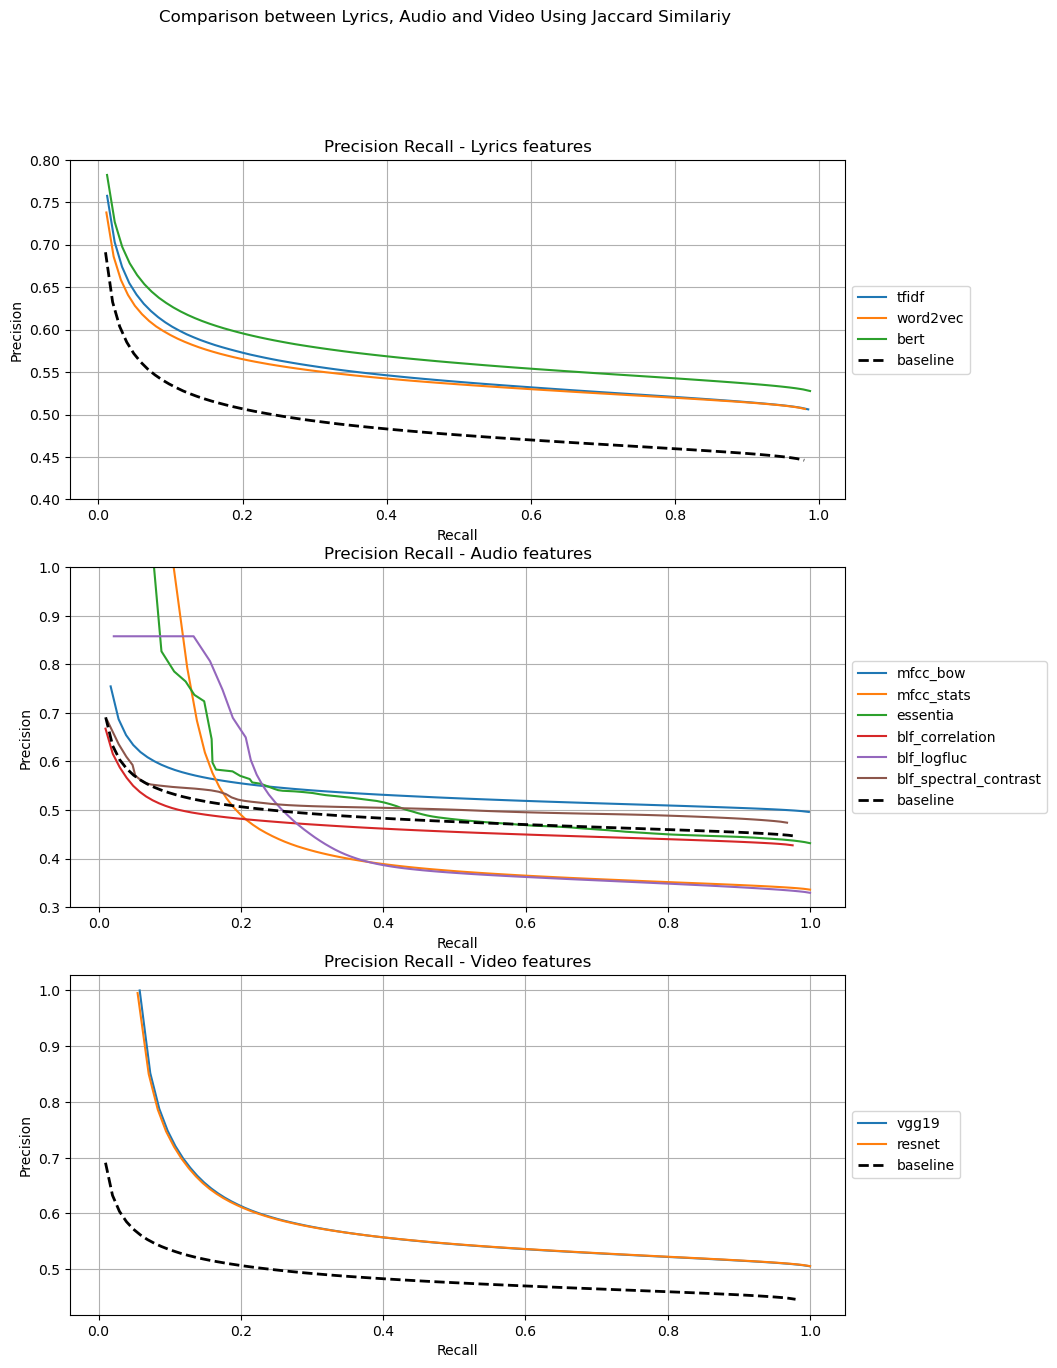

In [28]:
lyrics = ["tfidf", "word2vec", "bert"]
audio = ["mfcc_stats", "essentia", "blf_logfluc", "mfcc_bow", "blf_spectral_contrast", "blf_correlation"]
video = [ "vgg19", "resnet"]

fig, axs = plot_lyrics_audio_video_precision_curves(lyrics, audio, video, 
                                                    (jaccard_R, jaccard_P_max),  
                                                    datasets_keys, 
                                                    "Jaccard")
plt.show()

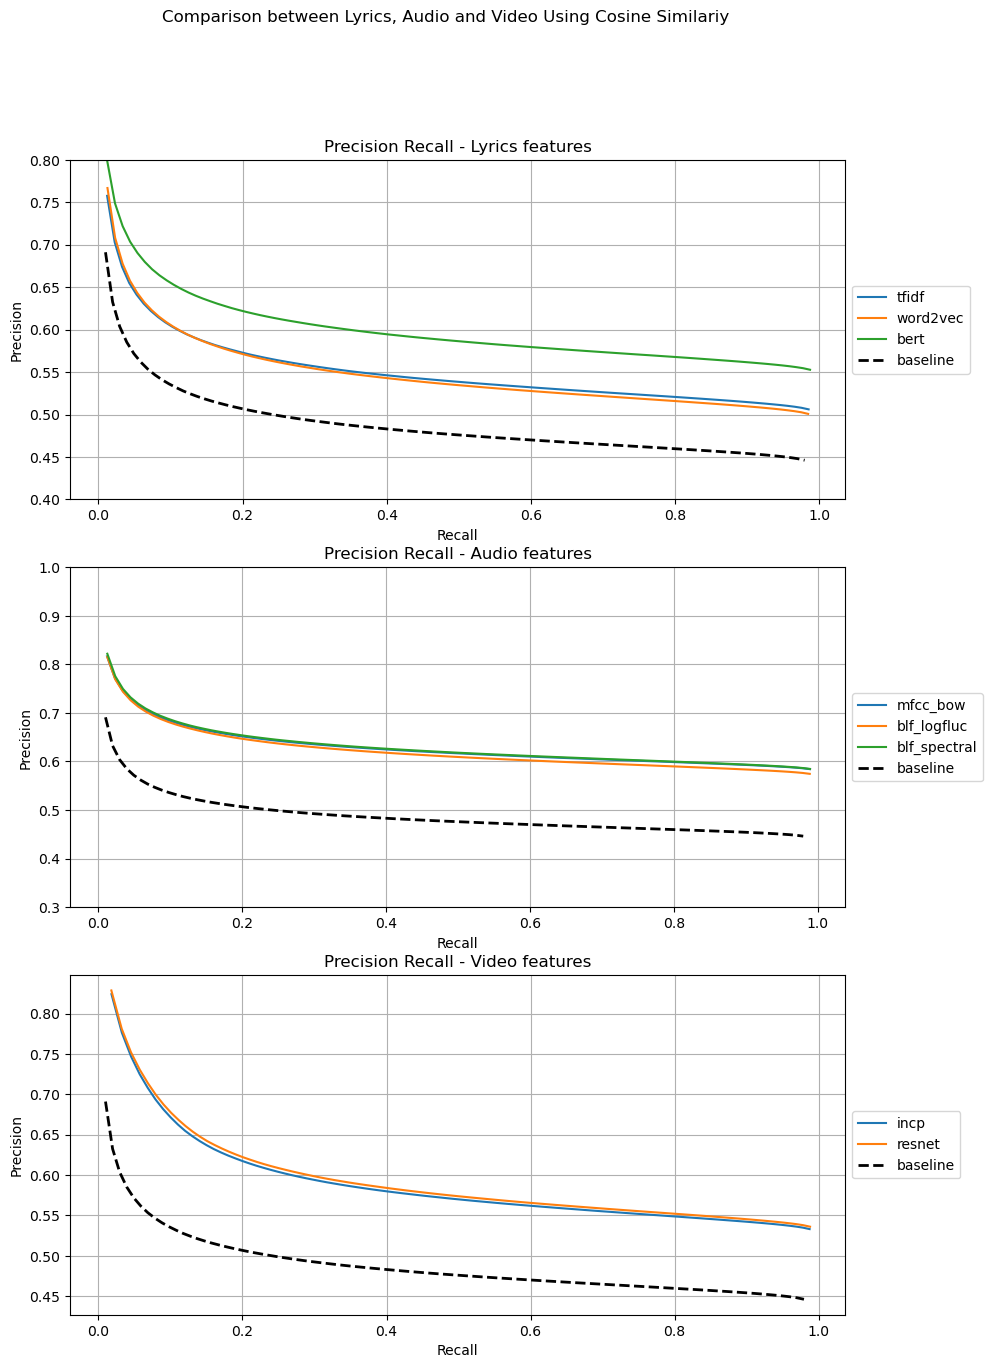

In [29]:
lyrics = ["tfidf", "word2vec", "bert"]
audio = ["blf_spectral", "mfcc_bow", "blf_logfluc"]
video = [ "incp",  "resnet"]
    
fig, axs = plot_lyrics_audio_video_precision_curves(lyrics, audio, video, 
                                                    (cosine_R, cosine_P_max),  
                                                    datasets_keys, 
                                                    "Cosine")
plt.show()

Text(0.5, 1.0, 'Precision Recall - Best features with Cosine')

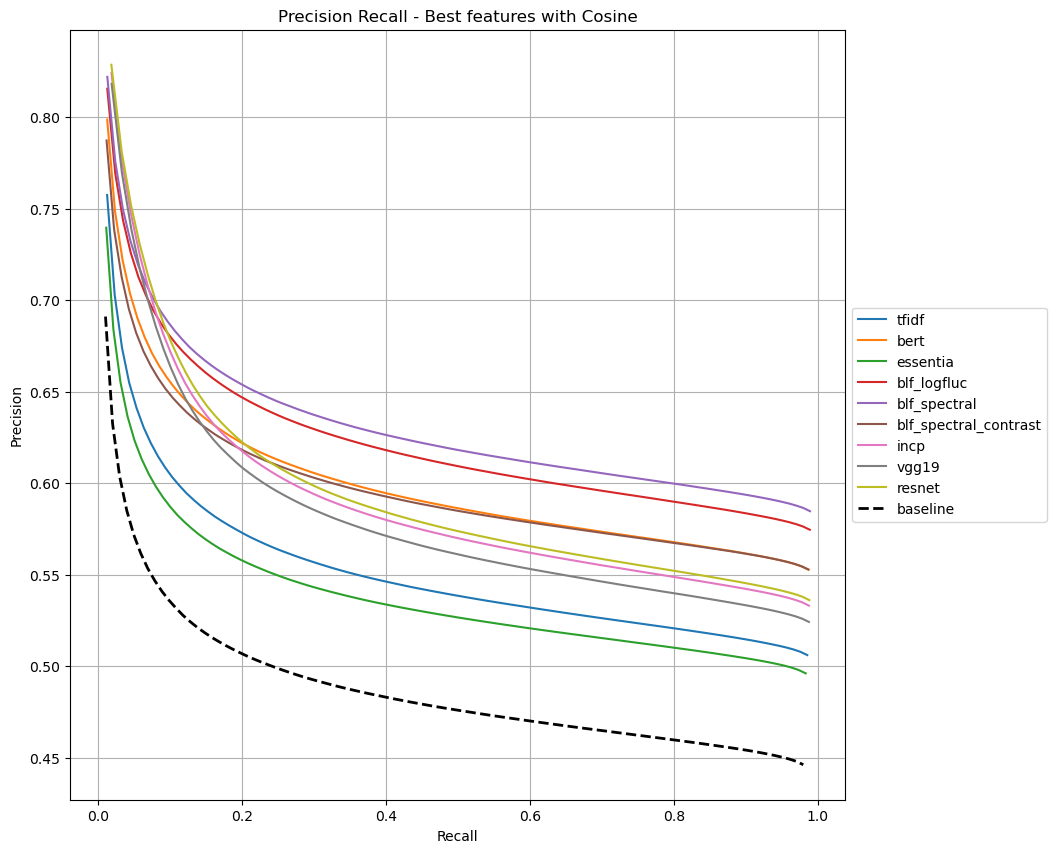

In [30]:
labels = datasets_keys
fig, axs = plt.subplots( figsize=(10, 10))

include = ["bert", "tfidf", "blf_spectral",  "blf_spectral_contrast", "blf_logfluc","vgg19", "incp", "essentia", "resnet"]
for i in range(len(labels)):
    if(labels[i]  in include):
        axs.plot(cosine_R[i], cosine_P_max[i], label=labels[i])
axs.plot(cosine_R[0], cosine_P_max[0], label='baseline', linestyle='dashed', color='black', linewidth=2)
axs.grid(True)
axs.legend(loc='center left', bbox_to_anchor=(1, 0.5))
axs.set_xlabel("Recall")
axs.set_ylabel("Precision")
axs.set_title("Precision Recall - Best features with Cosine")

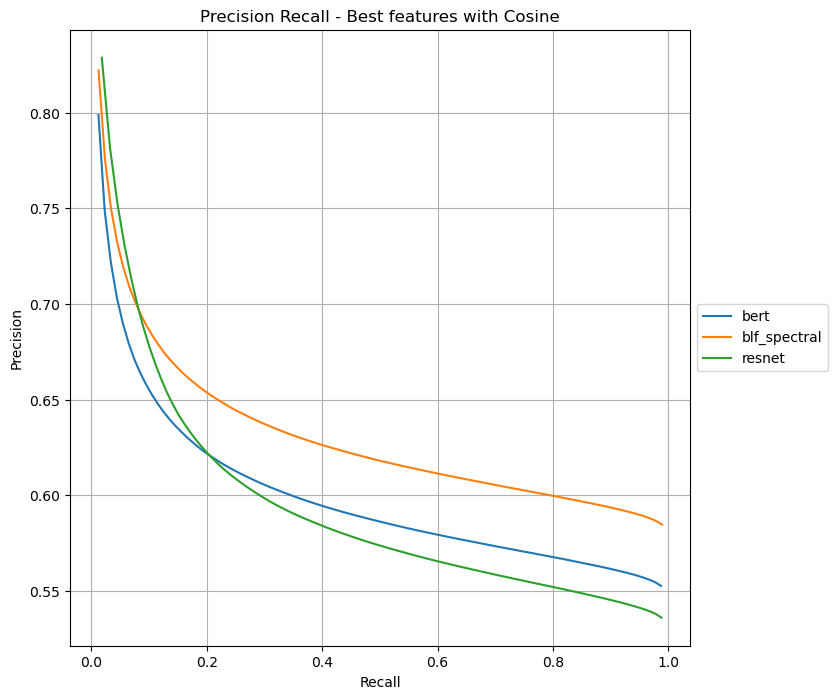

In [31]:

fig, axs = plt.subplots( figsize=(8, 8))
labels = datasets_keys
include = ["bert",  "blf_spectral", "resnet"]
for i in range(len(labels)):
    if(labels[i]  in include):
        axs.plot(cosine_R[i], cosine_P_max[i], label=labels[i])
# axs.plot(cosine_R[0], cosine_P_max[0], label='baseline', linestyle='dashed', color='black', linewidth=2)
axs.grid(True)
axs.legend(loc='center left', bbox_to_anchor=(1, 0.5))
axs.set_xlabel("Recall")
axs.set_ylabel("Precision")
axs.set_title("Precision Recall - Best features with Cosine")
plt.savefig('./plots/PreRecCosine_Best.png',bbox_inches='tight')

## Stability of top-k rankings between the retrieval algorithms

There is a function in scipy.stats that computes the kendall tau correlation.
However we founded the problem that this correlation works with sorting the values of the list and from there gets the concordant and discordant pair of values.

The problem is that we have for each query the id as string, and not numbers assigned to the ranks. And the scipy kendall tau function works trough sorting, so when sorting values it was taking in account the first letters of the id and not the rank.

Because of that,  we create a function that computes the kendall tau correlation given the top100 values for the same query in  2 differente features.

Creating for each list all the possible pair of values, and then extracting from it the concordant pairs to calculate the Kendall Tau correlation as defined in Modern Information and Retrieval, Ricardo Baeza-Yates, Berthier Ribeiro-Neto, 2nd Edition, pp.156

$$
    \tau = 1 -  \frac{2\Delta(R_1, R_2)}{K(K-1)}
$$


Where 
- $\Delta(R_1, R_2)$,  the number of discordant pairs in two rankings $R_1, R_2$
    
- $K$, the size of the ranking

In [32]:
def intersection(lst1, lst2):
    # Use of hybrid method
    temp = set(lst2)
    lst3 = [value for value in lst1 if value in temp]
    return lst3

In [33]:
def tauKendall(r1,r2, K):
    possible_pairs_r1 = [(a, b) for idx, a in enumerate(r1) for b in r1[idx + 1:]]
    possible_pairs_r2 = [(a, b) for idx, a in enumerate(r2) for b in r2[idx + 1:]]
    concordant_pairs = intersection(possible_pairs_r1, possible_pairs_r2)
    # 2 times size of concordant pairs because they are repeated in the two rankings
    delta = (K*(K-1)) - (len(concordant_pairs)*2)
    tau = 1 - ((2*delta) / (K*(K-1)))
    return tau

In [34]:
# Tesst with numbers in a list
test_custom = tauKendall([1,2,3,4,5,6,7],[1,3,6,2,7,4,5],7)
test_scipy  = stats.kendalltau([1,2,3,4,5,6,7],[1,3,6,2,7,4,5])
print("Custom Kendall Tau", test_custom, "\nScipy Kendall Tau", test_scipy)

Custom Kendall Tau 0.4285714285714286 
Scipy Kendall Tau SignificanceResult(statistic=0.4285714285714286, pvalue=0.2388888888888889)


In [35]:
# Case of letters
test_custom = tauKendall(['dog','cat','mouse','bird'],['bird', 'mouse', 'cat','dog'],4)
test_scipy  = stats.kendalltau(['dog','cat','mouse','bird'],['bird', 'mouse', 'cat','dog'])
print("Custom Kendall Tau", test_custom, "\nScipy Kendall Tau", test_scipy)

Custom Kendall Tau -1.0 
Scipy Kendall Tau SignificanceResult(statistic=-0.3333333333333334, pvalue=0.75)


When using strings in lists, the Kendall Tau from scipy doesn't work anymore, because underneath is based on ordering and not counting concordant or discordant pairs like our custom one. That is why we need to use a custom one to get valid results

In [36]:
# # List of possible queries
# queries = top_jaccard_tfidf.index.values
# print(queries.shape)

In [37]:
if (exists(file_corr_all_values_tau_cosine)) and (exists(file_correlations_cosine_tau)):
    correlations_cosine_tau = pd.read_csv(file_correlations_cosine_tau, index_col=0)
    corr_all_values_tau_cosine = pd.read_csv(file_corr_all_values_tau_cosine, index_col=0).to_numpy()
else:    
    correlations_cosine_tau = pd.DataFrame(index=cosine_df.keys(), columns=cosine_df.keys())
    df_cosine_list = list(cosine_df.keys())
    df_cosine_combinations_ = [(a, b) for idx, a in enumerate(df_cosine_list) for b in df_cosine_list[idx + 1:]]
    df_cosine_combinations =list(zip(df_cosine_list, df_cosine_list))
    df_cosine_combinations.extend(df_cosine_combinations_)
    corr_all_values_tau_cosine  = np.zeros((len(df_cosine_combinations), queries.shape[0]))
    print(corr_all_values_tau_cosine.shape)
    
    for i, (df1, df2) in tqdm(enumerate(possible_dataframe_list)):
        for idx,query in enumerate(queries):
            corr_all_values_tau_cosine[i, idx] = tauKendall(cosine_df[df1].loc[query].values, cosine_df[df2].loc[query].values, 100)
        correlations_cosine_tau.loc[df1, df2] = np.mean(corr_all_values_tau_cosine[i])
        
    correlations_cosine_tau.to_csv(file_correlations_cosine_tau)
    pd.DataFrame(corr_all_values_tau_cosine, index=possible_dataframe_list).to_csv(file_corr_all_values_tau_cosine)

In [38]:
correlations_cosine_tau

,tfidf,word2vec,bert,mfcc_bow,mfcc_stats,essentia,blf_delta_spectral,blf_correlation,blf_logfluc,blf_spectral,blf_spectral_contrast,blf_vardelta_spectral,incp,vgg19,resnet
tfidf,1.0,-0.961659,-0.995467,-0.999985,-0.999989,-0.999995,-0.999989,-0.999985,-0.999989,-0.999981,-0.999991,-0.999986,-0.999990,-0.999990,-0.999990
word2vec,NaN,1.000000,-0.989499,-0.999967,-0.999974,-0.999994,-0.999980,-0.999972,-0.999981,-0.999967,-0.999981,-0.999974,-0.999983,-0.999983,-0.999981
bert,NaN,NaN,1.000000,-0.999953,-0.999967,-0.999993,-0.999973,-0.999965,-0.999975,-0.999953,-0.999976,-0.999968,-0.999972,-0.999974,-0.999966
mfcc_bow,NaN,NaN,NaN,1.000000,-0.997123,-0.999813,-0.999649,-0.999549,-0.999822,-0.992859,-0.998384,-0.999786,-0.999934,-0.999935,-0.999927
mfcc_stats,NaN,NaN,NaN,NaN,1.000000,-0.999967,-0.999772,-0.999594,-0.999875,-0.999557,-0.999819,-0.999843,-0.999967,-0.999969,-0.999964
essentia,NaN,NaN,NaN,NaN,NaN,1.000000,-0.999963,-0.999986,-0.999969,-0.999752,-0.999970,-0.999988,-0.999993,-0.999993,-0.999992
blf_delta_spectral,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,-0.999311,-0.997846,-0.999042,-0.999737,-0.999284,-0.999962,-0.999962,-0.999959
blf_correlation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,-0.999869,-0.999032,-0.999819,-0.999176,-0.999966,-0.999967,-0.999964
blf_logfluc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,-0.999781,-0.999897,-0.999885,-0.999979,-0.999979,-0.999977
blf_spectral,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,-0.997942,-0.993414,-0.999930,-0.999929,-0.999927


In [39]:
if (exists(file_corr_all_values_tau_jaccard)) and (exists(file_correlations_jaccard_tau)):
    correlations_jaccard_tau = pd.read_csv(file_correlations_jaccard_tau, index_col=0)
    corr_all_values_tau_jaccard = pd.read_csv(file_corr_all_values_tau_jaccard, index_col=0).to_numpy()
else:
    print("Creating from zero")
    correlations_jaccard_tau = pd.DataFrame(index=jaccard_df.keys(), columns=jaccard_df.keys())
    df_jaccard_list = list(jaccard_df.keys())
    df_combinations_jaccard_ = [(a, b) for idx, a in enumerate(df_jaccard_list) for b in df_jaccard_list[idx + 1:]]
    df_combinations_jaccard =list(zip(df_jaccard_list, df_jaccard_list))
    df_combinations_jaccard.extend(df_combinations_jaccard_)
    corr_all_values_tau_jaccard  = np.zeros((len(df_combinations_jaccard), queries.shape[0]))
    print(corr_all_values_tau_jaccard.shape)  
    
    for i, (df1, df2) in tqdm(enumerate(df_combinations_jaccard)):
        for idx,query in enumerate(queries):
            corr_all_values_tau_jaccard[i, idx] = tauKendall(jaccard_df[df1].loc[query].values, jaccard_df[df2].loc[query].values, 100)
        correlations_jaccard_tau.loc[df1, df2] = np.mean(corr_all_values_tau_jaccard[i])
        
    correlations_jaccard_tau.to_csv(file_correlations_jaccard_tau)
    pd.DataFrame(corr_all_values_tau_jaccard, index=df_combinations_jaccard).to_csv(file_corr_all_values_tau_jaccard)

In [40]:
correlations_jaccard_tau

,tfidf,word2vec,bert,mfcc_bow,mfcc_stats,essentia,blf_delta_spectral,blf_correlation,blf_logfluc,blf_spectral,blf_spectral_contrast,blf_vardelta_spectral,incp,vgg19,resnet
tfidf,1.0,-0.966518,-0.995433,-0.999991,-0.999995,-0.999996,-0.999999,-0.999995,-0.999994,-0.999995,-0.999999,-0.999997,-0.999994,-0.999991,-0.999990
word2vec,NaN,1.000000,-0.997279,-0.999993,-0.999997,-0.999996,-1.000000,-0.999996,-0.999998,-0.999995,-1.000000,-0.999998,-0.999997,-0.999994,-0.999993
bert,NaN,NaN,1.000000,-0.999985,-0.999984,-0.999997,-0.999998,-0.999997,-0.999994,-0.999993,-0.999998,-0.999995,-0.999989,-0.999985,-0.999980
mfcc_bow,NaN,NaN,NaN,1.000000,-0.999692,-0.999995,-0.999950,-0.999990,-0.999601,-0.999829,-0.999950,-0.999979,-0.999925,-0.999881,-0.999885
mfcc_stats,NaN,NaN,NaN,NaN,1.000000,-0.999621,-0.999994,-0.999670,-0.986357,-0.990623,-0.999994,-0.999912,-0.999939,-0.999941,-0.999933
essentia,NaN,NaN,NaN,NaN,NaN,1.000000,-1.000000,-0.998937,-0.997556,-0.999974,-1.000000,-1.000000,-0.999844,-0.999937,-0.999922
blf_delta_spectral,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,-0.999970,-1.000000,-0.999231,-0.999971,-0.998702,-1.000000,-0.999999,-0.999998
blf_correlation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,-0.989813,-0.983221,-0.999970,-0.999954,-0.999996,-0.999996,-0.999997
blf_logfluc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,-0.973630,-1.000000,-0.999999,-0.999907,-0.999957,-0.999933
blf_spectral,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,-0.999231,-0.998597,-0.999996,-0.999994,-0.999995


In [41]:
# # Alternative to replace id strings with numbers, but at the end is the same results with the new function

# dict_values = dict(zip(top_cosine_tfidf.index.values, list(range(68641))))

# top_cosine_word2vec_numbers = top_cosine_word2vec.copy()
# for query in tqdm(queries):
#     values = { x :dict_values[x]  for x in np.unique(top_cosine_word2vec_numbers.loc[query])}
#     top_cosine_word2vec_numbers.loc[query].replace(values, inplace=True)

    
    
# top_cosine_tfidf_numbers = top_cosine_tfidf.copy()
# for query in tqdm(queries):
#     values = { x :dict_values[x]  for x in np.unique(top_cosine_tfidf_numbers.loc[query])}
#     top_cosine_tfidf_numbers.loc[query].replace(values, inplace=True)

    
# corr_tau_cosine_tfidf_word2vec = np.zeros((queries.shape[0]))
# for idx,query in tqdm(enumerate(queries)):
#     corr_tau_cosine_tfidf_word2vec[idx] = tauKendall(top_cosine_tfidf_numbers.loc[query].values, top_cosine_word2vec_numbers.loc[query].values, 100)

# TASK 3

- Implement the popularity bias metric $\%\Delta(Mean)$ using the provided Spotify popularity scores as indicator of popularity

For a single query q.

$$
    \%\Delta Mean(q) = \frac{Mean( popularity(d_1, ..., d_k) ) - popularity(q)}{popularity(q)}
$$

and compute the median over all queries to obtain $\%\Delta Mean$ over all queries  q's


In [42]:
spotify_data  = dt.fread("./../task3Data/id_metadata_mmsr.tsv", header=True).to_pandas()
spotify_data.set_index('id', inplace=True)

In [43]:
spotify_data.head(1)

,spotify_id,popularity,release,danceability,energy,key,mode,valence,tempo,duration_ms
id,,,,,,,,,,
0009fFIM1eYThaPg,3eObKIfHKJ1nAPh0wTxFCc,12.0,2009,0.635,0.746,6.0,1.0,0.548,110.973,229947


In [44]:
# We only need the popularity
spotify_data = spotify_data[["popularity"]]

In [45]:
# There are 137 songs that have popularity 0 in spotify dataset
np.sum(spotify_data["popularity"] == 0)

137

> The definition of the function is in the functions.py file

In [47]:
# Test
bias_values = np.median(get_popularity_bias_metric(top_cosine_tfidf, spotify_data, np.mean))
print(bias_values)

0.062432432432432496


### Measuring Hubness in IR Algorithms
K-Ocurrence $N^k (x)$ : Frequency of document x in all result lists.

Hubness $S^k$: Skewness of distribution of k-ocurrences $N^k$

$$
    S^k = \frac{E[(N^k - \mu (N^k))^3]}{\sigma ^3 (N^k)}
$$

- Positive skewness indicated high hubness
- Negative skewness indicates low hubness

In [48]:
np.sum(cosine_df["tfidf"][cosine_df["tfidf"] == '0009fFIM1eYThaPg'].count().values[:100])

351

In [49]:
unique, counts = np.unique(cosine_df["tfidf"].values[:,:100], return_counts=True)

In [50]:
unique

array(['0009fFIM1eYThaPg', '0010xmHR6UICBOYT', '002Jyd0vN4HyCpqL', ...,
       'zzz0n04uuTUA7fNh', 'zzznMjZAKnJJXQSj', 'zzzwh2ktIWjsR7xp'],
      dtype=object)

In [51]:
counts

array([351,   1,  38, ..., 141,  60, 245])

In [52]:
s = ((counts - np.mean(counts))**3)/(np.std(counts)**3)
print(np.mean(s))

4.214573663144184


> The definition of the function is in the functions.py file

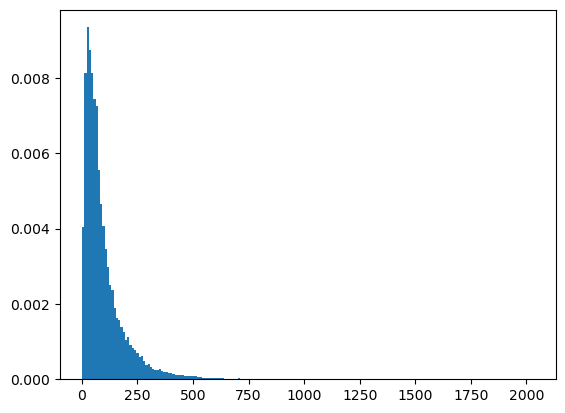

In [54]:
x, bins, p =plt.hist(counts, bins=200, density=True)
plt.show()

In [55]:
# # Test hubness metric
# hubness_10 = metric_hubness(top_cosine_tfidf, 10)
# hubness_100 = metric_hubness(top_cosine_tfidf, 100)
# print(hubness_10, hubness_100)

In [56]:
metrics_cosine_complete = get_metrics_file(file_metrics_cosine, cosine_df, genres, spotify_data)
metrics_jaccard_complete = get_metrics_file(file_metrics_jaccard, jaccard_df, genres, spotify_data)

In [57]:
metrics_cosine_complete

,MAP_10,MAP_100,MRR_10,MRR_100,Mean NDCG_10,Mean NDCG_100,%DeltaMean,S10,S100
baseline,0.538928,0.468788,0.598932,0.603907,0.647442,0.702656,0.022000,0.323246,0.094932
tfidf,0.613008,0.533717,0.675649,0.679554,0.708545,0.749511,0.062432,4.687365,4.214574
word2vec,0.620400,0.531775,0.688450,0.691843,0.716072,0.752696,0.102632,16.733562,10.633617
bert,0.662672,0.582196,0.724919,0.727862,0.749986,0.782546,0.057727,12.455242,6.382343
mfcc_bow,0.686824,0.611884,0.745530,0.748228,0.769581,0.799817,0.057500,3.542057,2.684883
mfcc_stats,0.664766,0.590064,0.723618,0.726565,0.751656,0.784836,0.044250,4.471838,3.898258
essentia,0.589838,0.518657,0.652015,0.655964,0.690800,0.738632,0.019474,-0.058209,-3.909482
blf_delta_spectral,0.660291,0.580011,0.724746,0.727659,0.749790,0.782696,0.041429,5.732972,4.060605
blf_correlation,0.659301,0.576152,0.721618,0.724617,0.748001,0.779366,0.097297,6.644654,5.174361
blf_logfluc,0.684362,0.606019,0.743900,0.746621,0.767867,0.796682,0.046486,3.962746,2.879804


In [58]:
metrics_jaccard_complete

,MAP_10,MAP_100,MRR_10,MRR_100,Mean NDCG_10,Mean NDCG_100,%DeltaMean,S10,S100
baseline,0.538928,0.468788,0.598932,0.603907,0.647442,0.702656,0.022000,0.323246,0.094932
tfidf,0.613008,0.533717,0.675649,0.679554,0.708545,0.749511,0.062432,4.687365,4.214574
word2vec,0.595455,0.528458,0.654077,0.658399,0.691671,0.738485,0.092500,27.378175,15.622976
bert,0.635672,0.555337,0.701501,0.704617,0.730580,0.768298,0.007436,6.609577,4.892092
mfcc_bow,0.587747,0.517094,0.655531,0.660159,0.690866,0.742419,0.025610,22.651748,31.111243
mfcc_stats,0.816116,0.487810,1.000000,1.000000,0.872848,0.757469,0.199429,80.605775,25.205471
essentia,0.859410,0.564858,1.000000,1.000000,0.900627,0.806830,-0.008857,87.295897,26.220871
blf_delta_spectral,0.550818,0.342966,0.677026,0.683731,0.654726,0.617797,0.168333,2.104290,1.507145
blf_correlation,0.519026,0.446352,0.576503,0.581919,0.627646,0.687641,0.071250,22.281378,15.505324
blf_logfluc,0.776459,0.473369,0.845938,0.845938,0.931068,0.789124,0.282778,97.324513,27.221046


## Evaluation of datasets with MAP, MRR and Mean NDCG at top 100 cosine and jaccard

In [59]:
# metrics_early_fusion_jaccard = generate_MAP_MRR_NDCG_file(file_metrics_earlyfusion_jaccard, jaccard_early_datasets)
metrics_early_fusion_jaccard = get_metrics_file(file_metrics_earlyfusion_jaccard, jaccard_early_datasets, genres, spotify_data)

In [60]:
metrics_early_fusion_jaccard

,MAP_10,MAP_100,MRR_10,MRR_100,Mean NDCG_10,Mean NDCG_100,%DeltaMean,S10,S100
baseline,0.538928,0.468788,0.598932,0.603907,0.647442,0.702656,0.022000,0.323246,0.094932
bert_essentia_vgg19,0.589477,0.518556,0.651059,0.655025,0.690644,0.738578,0.019444,-0.050811,-3.907452
bert_essentia_resnet,0.589477,0.518556,0.651059,0.655025,0.690644,0.738578,0.019444,-0.050811,-3.907452
bert_blf_logfluc_vgg19,0.684423,0.606072,0.743914,0.746632,0.767961,0.796720,0.046765,3.953840,2.877865
bert_blf_logfluc_resnet,0.684353,0.606024,0.743885,0.746607,0.767841,0.796677,0.046571,3.959753,2.879721
bert_mfcc_stats_vgg19,0.687608,0.595132,0.750636,0.753367,0.770136,0.791875,0.110000,6.752516,5.450198
bert_mfcc_stats_resnet,0.681194,0.597696,0.742023,0.744773,0.765183,0.791569,0.081429,6.536200,4.848021
tfidf_essentia_vgg19,0.589633,0.518556,0.651896,0.655846,0.690835,0.738598,0.019429,-0.056743,-3.907019
tfidf_essentia_resnet,0.589633,0.518556,0.651896,0.655846,0.690835,0.738598,0.019429,-0.056743,-3.907019
tfidf_blf_logfluc_vgg19,0.684428,0.606073,0.743899,0.746617,0.767971,0.796721,0.046765,3.953670,2.877887


In [61]:
# metrics_early_fusion_cosine = generate_MAP_MRR_NDCG_file(file_metrics_earlyfusion_cosine, cosine_early_datasets)
metrics_early_fusion_cosine = get_metrics_file(file_metrics_earlyfusion_cosine,cosine_early_datasets, genres, spotify_data)

In [62]:
metrics_early_fusion_cosine

,MAP_10,MAP_100,MRR_10,MRR_100,Mean NDCG_10,Mean NDCG_100,%DeltaMean,S10,S100
baseline,0.538928,0.468788,0.598932,0.603907,0.647442,0.702656,0.022000,0.323246,0.094932
bert_blf_spectral_resnet,0.709969,0.588260,0.773099,0.775903,0.784508,0.791997,0.051333,5.940676,4.368241
bert_blf_spectral_incp,0.703842,0.584462,0.767435,0.770270,0.780445,0.789000,0.050000,10.312802,7.806865
bert_mfcc_bow_resnet,0.729101,0.611167,0.791443,0.793982,0.800269,0.806542,0.062143,6.194223,4.375171
bert_mfcc_bow_incp,0.742106,0.634882,0.802869,0.805143,0.811587,0.819520,0.070833,9.555807,7.299239
bert_blf_logfluc_resnet,0.684353,0.606024,0.743885,0.746607,0.767841,0.796677,0.046571,3.959753,2.879721
bert_blf_logfluc_incp,0.684355,0.606017,0.743882,0.746607,0.767859,0.796681,0.046486,3.960009,2.879688
tfidf_blf_spectral_resnet,0.709934,0.588238,0.773073,0.775879,0.784464,0.791977,0.051250,5.941250,4.368690
tfidf_blf_spectral_incp,0.703593,0.584259,0.767169,0.770008,0.780206,0.788870,0.050286,10.306988,7.806771
tfidf_mfcc_bow_resnet,0.729073,0.611143,0.791484,0.794020,0.800227,0.806522,0.062162,6.196735,4.375969


In [63]:
# This is only to style the dataframe, NOT IMPORTANT
def min_value(s, notApply):
    if s.name in notApply:
        return None
    is_max = s == s.min()
#     print(is_max,"\n")
    return ['color: red' if v else '' for v in is_max]

def highlight(s,p,color,notApply):
    if s.name in notApply:
        return None
    is_max = s.isin(s.nlargest(3).iloc[[p]])
    return [f'background-color: {color}' if v else '' for v in is_max]

def skewnessStyleUnder1(s):
    if s.name in ["S10", "S100"]:
        below_1 = np.absolute(s) < 1
        return ['color: blue' if v else '' for v in below_1]
    else:
        return ['' for v in range(len(s))]

def skewnessStyleHigh(s):
    if s.name in ["S10", "S100"]:
        high_value = s == np.absolute(s).max()
        return ['color: red' if v else '' for v in high_value]
    else:
        return ['' for v in range(len(s))]

def negativeDelta(s):
    if s.name in ["%DeltaMean"]:
        negative = s<0
        return ['text-decoration: underline;' if v else '' for v in negative]
    else:
        return ['' for v in range(len(s))]
    
def lowDelta(s):
    if s.name in ["%DeltaMean"]:
        near_zero = s.isin(s.nsmallest(3))
        return ['color:blue;' if v else '' for v in near_zero]
    else:
        return ['' for v in range(len(s))]
    
def highDelta(s):
    if s.name in ["%DeltaMean"]:
        near_zero = s.isin(s.nlargest(3))
        return ['color: red;' if v else '' for v in near_zero]
    else:
        return ['' for v in range(len(s))]

def style_df(dataframe, group2):
    return dataframe.style.\
        apply(highlight,p=0,color='DarkTurquoise  ', notApply=group2).\
        apply(highlight,p=1,color='DarkSeaGreen  ' , notApply=group2).\
        apply(highlight,p=2,color='PaleGreen ' , notApply=group2).\
        apply(min_value, notApply=group2).\
        apply(skewnessStyleUnder1).\
        apply(skewnessStyleHigh).\
        apply(negativeDelta).\
        apply(lowDelta).\
        apply(highDelta)
        

> Positive %Δ𝑀𝑒𝑎𝑛 and %Δ𝑀𝑒𝑑𝑖𝑎𝑛 indicate that overall more popular tracks are recommended to the user. Since
M(𝐻𝑢 (𝑡)) 𝑖
𝑀𝑒𝑎𝑛 is sensitive to outliers, the interplay between these metrics provides additional information about the changes in popularity.

### Cosine Table

In [91]:
cosine_early_P, cosine_early_R, cosine_early_P_max = get_preicison_data(file_cosine_early_mean_precision_datasets,
                                                                        file_cosine_early_mean_recall_datasets,
                                                         file_cosine_early_maxprecision_precision_datasets,
                                                         cosine_early_datasets,
                                                         genres
                                                        )

In [106]:
jaccard_early_P, jaccard_early_R, jaccard_early_P_max = get_preicison_data(file_jaccard_early_mean_precision_datasets,
                                                                        file_jaccard_early_mean_recall_datasets,
                                                         file_jaccard_early_maxprecision_precision_datasets,
                                                         jaccard_early_datasets,
                                                         genres  )

Text(0.5, 1.0, 'Precision Recall - Best features with Cosine')

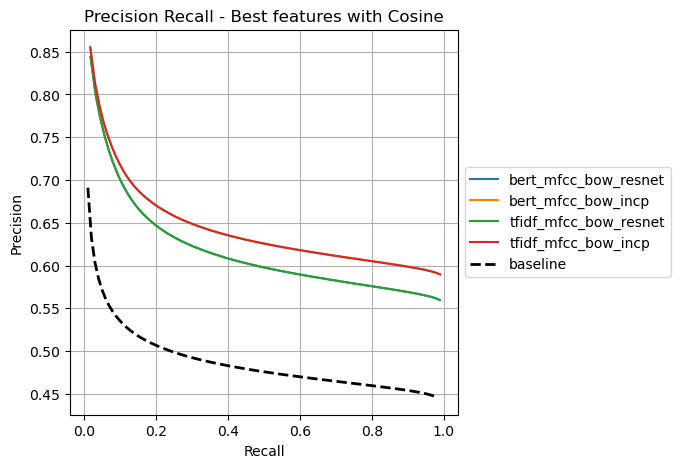

In [108]:
labels = list(cosine_early_datasets.keys())
fig, axs = plt.subplots( figsize=(5, 5))

include = ["bert_mfcc_bow_incp", "tfidf_mfcc_bow_incp", "bert_mfcc_bow_resnet", "tfidf_mfcc_bow_resnet"]
for i in range(len(labels)):
    if(labels[i]  in include):
        axs.plot(cosine_early_R[i], cosine_early_P_max[i], label=labels[i])
axs.plot(cosine_R[0], cosine_P_max[0], label='baseline', linestyle='dashed', color='black', linewidth=2)
axs.grid(True)
axs.legend(loc='center left', bbox_to_anchor=(1, 0.5))
axs.set_xlabel("Recall")
axs.set_ylabel("Precision")
axs.set_title("Precision Recall - Best features with Cosine")
# plt.savefig('./plots/PreRecCosine_Best.png',bbox_inches='tight')

Text(0.5, 1.0, 'Precision Recall - Comparison Best models')

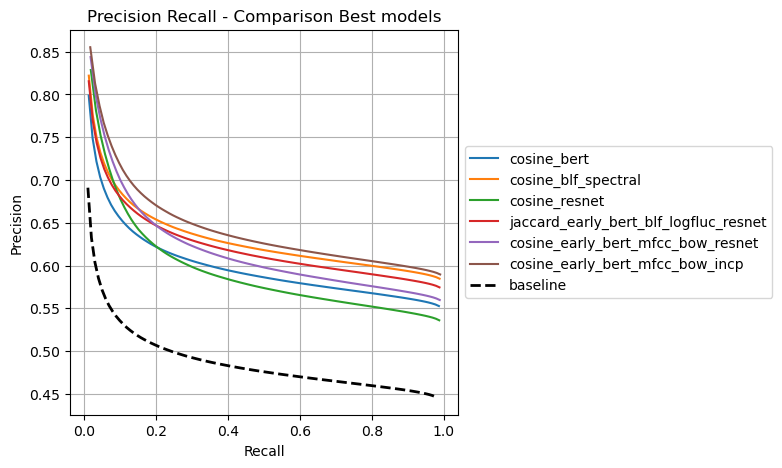

In [127]:
fig, axs = plt.subplots( figsize=(5, 5))

labels = datasets_keys
include = ["bert",  "blf_spectral", "resnet"]
for i in range(len(labels)):
    if(labels[i]  in include):
        axs.plot(cosine_R[i], cosine_P_max[i], label=f'cosine_{labels[i]}')

labels = list(jaccard_early_datasets.keys())
include = ["bert_blf_logfluc_resnet"]
for i in range(len(labels)):
    if(labels[i]  in include):
        axs.plot(jaccard_early_R[i], jaccard_early_P_max[i], label=f'jaccard_early_{labels[i]}')
        
labels = list(cosine_early_datasets.keys())
include = ["bert_mfcc_bow_incp",  "bert_mfcc_bow_resnet"]
for i in range(len(labels)):
    if(labels[i]  in include):
        axs.plot(cosine_early_R[i], cosine_early_P_max[i], label=f'cosine_early_{labels[i]}')
        
axs.plot(jaccard_R[0], jaccard_P_max[0], label='baseline', linestyle='dashed', color='black', linewidth=2)
axs.grid(True)
axs.legend(loc='center left', bbox_to_anchor=(1, 0.5))
axs.set_xlabel("Recall")
axs.set_ylabel("Precision")
axs.set_title("Precision Recall - Comparison Best models")

In [125]:
cosine_values = pd.concat([metrics_cosine_complete, metrics_early_fusion_cosine.drop("baseline")])
new_indexes = [ f'cosine_{index}' if index != 'baseline' else index for index in cosine_values.index.values ]
cosine_values.index = new_indexes
# style_df(cosine_values,["%DeltaMean","S10","S100"])

### Jaccard Table

In [88]:
jaccard_values = pd.concat([metrics_jaccard_complete, metrics_early_fusion_jaccard.drop("baseline")])
new_indexes = [ f'jaccard_{index}' for index in jaccard_values.index.values]
jaccard_values.index = new_indexes
# style_df(jaccard_values,["%DeltaMean","S10","S100"])

In [89]:
style_df(pd.concat([cosine_values,jaccard_values.drop('jaccard_baseline')]),["%DeltaMean","S10","S100"])

,MAP_10,MAP_100,MRR_10,MRR_100,Mean NDCG_10,Mean NDCG_100,%DeltaMean,S10,S100
baseline,0.538928,0.468788,0.598932,0.603907,0.647442,0.702656,0.022000,0.323246,0.094932
cosine_tfidf,0.613008,0.533717,0.675649,0.679554,0.708545,0.749511,0.062432,4.687365,4.214574
cosine_word2vec,0.620400,0.531775,0.688450,0.691843,0.716072,0.752696,0.102632,16.733562,10.633617
cosine_bert,0.662672,0.582196,0.724919,0.727862,0.749986,0.782546,0.057727,12.455242,6.382343
cosine_mfcc_bow,0.686824,0.611884,0.745530,0.748228,0.769581,0.799817,0.057500,3.542057,2.684883
cosine_mfcc_stats,0.664766,0.590064,0.723618,0.726565,0.751656,0.784836,0.044250,4.471838,3.898258
cosine_essentia,0.589838,0.518657,0.652015,0.655964,0.690800,0.738632,0.019474,-0.058209,-3.909482
cosine_blf_delta_spectral,0.660291,0.580011,0.724746,0.727659,0.749790,0.782696,0.041429,5.732972,4.060605
cosine_blf_correlation,0.659301,0.576152,0.721618,0.724617,0.748001,0.779366,0.097297,6.644654,5.174361
cosine_blf_logfluc,0.684362,0.606019,0.743900,0.746621,0.767867,0.796682,0.046486,3.962746,2.879804


## Here we will save the model that uses the API

Only pass it to `generateTopModel(MODEL_SELECTED)` and returns two df that are necessary to work in server

In [113]:
def transform_tops_to_numbers(topDf, ids_to_numbers):
    return topDf.apply(lambda s : [ids_to_numbers[x] for x in s] , raw=True , axis=1)

def generateTopModel(dataset):
    ids_to_number_data = dict(zip(dataset.index.values, list(range(68641))))
    model = transform_tops_to_numbers(dataset, ids_to_number_data)
    return model, ids_to_number_data

In [114]:
mod, id_nums = generateTopModel(top_cosine_bert_mfcc_bow_incp)

In [124]:
list(id_nums.items())[:3]

[('9jbSytob9XRzwvB6', 0), ('Njp6JPM8vitbhVJU', 1), ('h48f46ZsT9h0Z5Dm', 2)]

In [115]:
top_cosine_bert_mfcc_bow_incp.head(1)

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
index,,,,,,,,,,,,,,,,,,,,,
9jbSytob9XRzwvB6,wuP1QWHWdF78d4zL,P3U2OrFnVj3YffBb,Hm6MySKMEHNNXWIZ,qpzR7y31BWfHEG8B,wGtRk0NsXSSE3A3d,7Pzpe1nTIGW5j808,AA0Jl1rqjJVzvnaN,KQYWHSWV7XR1hSNh,JvJWxF1NA5pSYrmW,TkfxShldqUCGcK5V,...,kGCMYgSWAswXklUk,gDUilzORC22Y3ujd,p8sNCDqeNF17O0mW,8CjhEezJNedv1Jkd,s8Tfx5bqoOomDW2g,g3bzRZXbUBNGXIeu,WHatgxsWhbEx5Frf,3P3uQTWd3JxAexBT,NkRdzcEewFKiR81F,QAOZbudGY68j2leG


In [116]:
mod.head(1)

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
index,,,,,,,,,,,,,,,,,,,,,
9jbSytob9XRzwvB6,31491,12395,40195,64859,10407,52096,30645,51657,266,47045,...,31140,54115,21336,12614,32881,31205,15139,53428,68560,21256


In [78]:
# The model will be saved here, this is needed for the backend to work and have a small size
mod.to_csv('./TopIdsFusion/model_selected.csv')
# Save ids_to_numbers csv
pd.DataFrame({"idNumber":id_nums.values(), "id":id_nums.keys()}).\
    to_csv('./TopIdsFusion/relation_id_number.csv', index=False)